# 机器学习：Fashion MNIST分类与可视化
2022217425 费博

## 1、导入包以及数据
NumPy是Python中用于进行科学计算的基础库。它提供了支持大型多维数组和矩阵的功能，并包含大量用于执行数学运算的高效函数。NumPy在数据分析、数值计算和机器学习等领域中广泛应用。Pandas是一个强大的数据处理和分析库，提供了数据结构和数据分析工具。它特别适合处理结构化数据，例如表格数据或时间序列数据。TensorFlow是一个开源的深度学习框架，由Google开发。它提供了一系列工具和库，帮助用户构建、训练和部署机器学习和深度学习模型。TensorFlow具有强大的可扩展性，适用于从小型实验到大型生产系统的各种应用。Matplotlib是一个用于创建静态、动态和交互式可视化的绘图库。它可以生成各种图表，包括折线图、散点图、柱状图和直方图，广泛应用于数据分析和科学研究中。Keras是一个高级神经网络API，作为TensorFlow的一个模块，它简化了神经网络的构建和训练过程。Keras提供了简单而直观的接口，使得快速原型设计和实验变得容易。

## 1.1 导入包

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, LSTM, Dropout
from tensorflow.keras.regularizers import l2

2024-05-20 17:06:21.296897: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 17:06:25.218153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 17:06:25.218311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 17:06:25.245298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 17:06:26.648468: I tensorflow/core/platform/cpu_feature_g

## 1.2 加载数据

In [2]:
# 加载数据
train_data = pd.read_csv('./data/fashion-mnist_train.csv')
test_data = pd.read_csv('./data/fashion-mnist_test.csv')

## 1.3 输出数据信息

In [17]:
# 输出数据信息
print("train_info:")
print(train_data.info())
print("test_info:")
print(test_data.info())

train_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
test_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


## 2、对数据进行处理

### 2.1 获取x和y

In [3]:
# 分离特征和标签
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [4]:
# 归一化
X_train = X_train / 255.0

X_test = X_test / 255.0

### 2.2 训练集和测试集的形状

In [18]:
print("tarin_shape:")
print(X_train.shape)
print(y_train.shape)

print("test_shape:")
print(X_test.shape)
print(y_test.shape)

tarin_shape:
(60000, 28, 28)
(60000,)
test_shape:
(10000, 28, 28)
(10000,)


In [5]:
# 调整形状为 (样本数量, 时间步数, 特征数)
X_train = X_train.reshape(X_train.shape[0], 28, 28)

X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [19]:
print("tarin_shape:")
print(X_train.shape)
print(y_train.shape)

print("test_shape:")
print(X_test.shape)
print(y_test.shape)

tarin_shape:
(60000, 28, 28)
(60000,)
test_shape:
(10000, 28, 28)
(10000,)


## 2.3 数据可视化

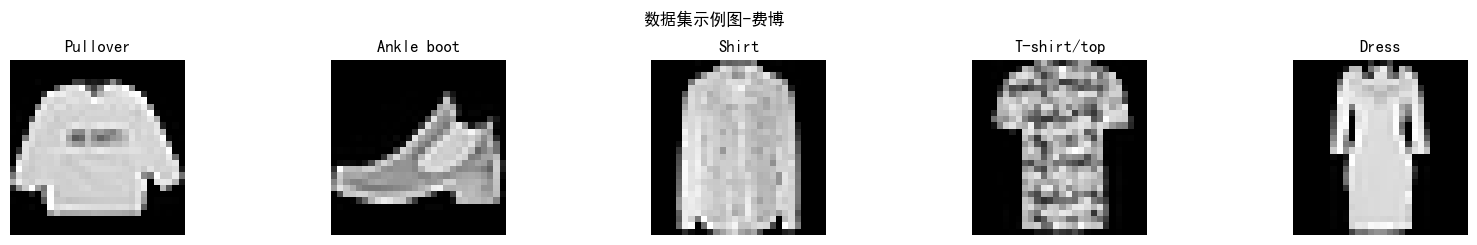

In [25]:
# 数据探索与可视化
labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def plot_images(images, labels):
    n = 5 # 展示10张图片
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2, 5, i + 1)
        img = images[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(labels_dict[labels[i]])
        plt.axis('off')
    plt.suptitle('数据集示例图-费博')  # 设置总标题
    plt.show()

plot_images(X_train, y_train)

### 2.3 定义模型并输出模型信息

In [6]:
# 定义模型并输出模型信息
# model = Sequential([
 #   SimpleRNN(64, input_shape=(28, 28), return_sequences=True),
#    Dense(32, activation='relu'),
  #  Dense(10, activation='softmax')
#])

rnn_model=Sequential()

rnn_model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences= True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(128, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(10, activation='softmax'))

rnn_model.summary()


2024-05-20 17:06:54.493535: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:06:56.274127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:06:56.274978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:06:56.280697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:06:56.281237: I tensorflow/compile

r/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:07:02.221763: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:07:02.222164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 17:07:02.222182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1977] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-05-20 17:07:02.222490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to r

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

## 3、编译模型|

In [7]:
# 编译模型
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 4、训练模型
设置epochs为10，batch_size为64，设置验证集数据

In [8]:
# 训练模型
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


2024-05-20 17:07:21.781092: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb77c009d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-20 17:07:21.781132: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-05-20 17:07:21.904696: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-20 17:07:23.260381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-05-20 17:07:23.501850: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 131s 121ms/step - loss: 0.7994 - accuracy: 0.7044 - val_loss: 0.4919 - val_accuracy: 0.8195
Epoch 2/10
938/938 [==============================] - 115s 123ms/step - loss: 0.4897 - accuracy: 0.8247 - val_loss: 0.4368 - val_accuracy: 0.8372
Epoch 3/10
938/938 [==============================] - 118s 126ms/step - loss: 0.4239 - accuracy: 0.8465 - val_loss: 0.4088 - val_accuracy: 0.8499
Epoch 4/10
938/938 [==============================] - 114s 122ms/step - loss: 0.4006 - accuracy: 0.8551 - val_loss: 0.3556 - val_accuracy: 0.8644
Epoch 5/10
938/938 [==============================] - 112s 119ms/step - loss: 0.3673 - accuracy: 0.8669 - val_loss: 0.3285 - val_accuracy: 0.8755
Epoch 6/10
938/938 [==============================] - 115s 122ms/step - loss: 0.3447 - accuracy: 0.8745 - val_loss: 0.3426 - val_accuracy: 0.8710
Epoch 7/10
938/938 [==============================] - 115s 122ms/step - loss: 0.3298 - accuracy: 0.8807 - val_loss: 0.2978 - val_accura

## 5、打印预测性能

In [21]:
# 打印预测性能 第一个值表示模型在测试集上的损失值 第二个值表示模型在测试集上的准确率
score= rnn_model.evaluate(X_test,y_test, verbose=0)
print(score)

[0.29383477568626404, 0.892300009727478]


## 6、可视化模型预测信息

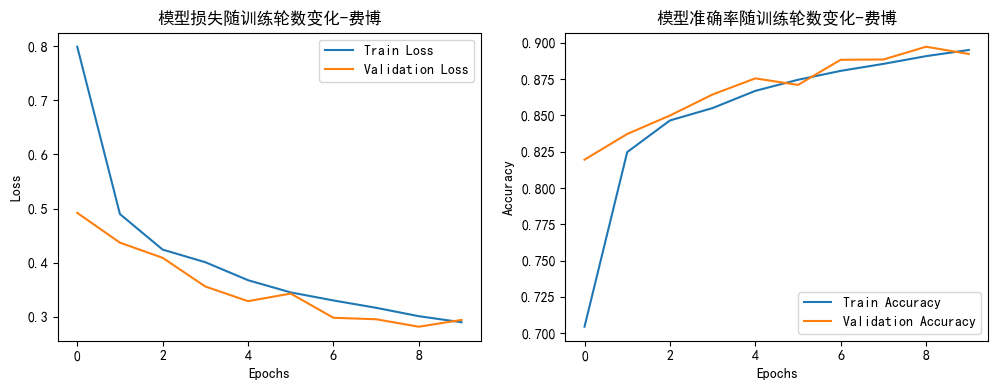

In [10]:
# 确保Matplotlib内联显示图形
%matplotlib inline
# 使用 plt.rcParams 更新全局设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 绘制训练过程中的损失和准确率曲线
plt.figure(figsize=(12, 4))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('模型损失随训练轮数变化-费博')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('模型准确率随训练轮数变化-费博')
plt.legend()

plt.show()